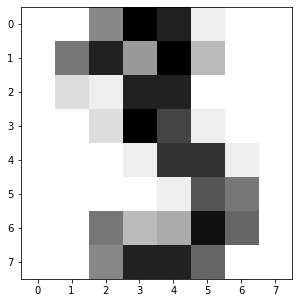

[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
이 숫자는  3 입니다.


In [1]:
# MNIST 데이터 시각화 및 타겟(레이블) 출력
from sklearn import datasets
import matplotlib.pyplot as plt

digit = datasets.load_digits()

plt.figure(figsize=(5,5))
plt.imshow(digit.images[3],cmap=plt.cm.gray_r,interpolation='nearest')

plt.show()
print(digit.data[3])
print('이 숫자는 ',digit.target[3],"입니다.")

MNIST 데이터셋은 8x8 픽셀 이미지를 64차원 특징 벡터로 표현한 데이터이다

In [2]:
# 실제 숫자 인식 구현
from sklearn import svm

s = svm.SVC(gamma=0.1,C=10)
s.fit(digit.data,digit.target)

# sample data를 MNIST 데이터셋 앞의 3개로 선정 후 인식
new_d = [digit.data[0],digit.data[1],digit.data[2]] # 0, 1, 2
res = s.predict(new_d)
print("예측값은 ",res)
print("실제 값은 ",digit.target[0],digit.target[1],digit.target[2])

예측값은  [0 1 2]
실제 값은  0 1 2


In [3]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋은 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits()
x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,train_size=0.6) # 훈련 데이터셋 비율 60%, 테스트 데이터셋 비울 40%

# SVM을 통해 학습 및 예측
s = svm.SVC(gamma=0.001)
s.fit(x_train,y_train)
res = s.predict(x_test)

# 혼동 행렬 생성
conf = np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# accuracy 측정
not_correct = 0
for i in range(10):
    not_correct+=conf[i][i]
accuracy = not_correct/len(res)
print("accuracy =",accuracy*100)

[[73.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 73.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0. 65.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 61.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. 67.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 81.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 66.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. 83.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 74.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. 69.]]
accuracy = 99.02642559109874


In [4]:
# cross_val_score을 활용한 교차 검증
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(s,digit.data,digit.target,cv=5) # 5겹 교차 검증
print(accuracies)
print("정확률(평균)=%0.3f,표춘편차=%0.3f"%(accuracies.mean()*100,accuracies.std()))

[0.975      0.95       0.98328691 0.99164345 0.96100279]
정확률(평균)=97.219,표춘편차=0.015
